# Seperating stock to forcast for certain dates depending on the product

In [1]:
%pip install nbformat


[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# import datasets and transformations (reusability purposes)
from IPython import get_ipython

get_ipython().run_line_magic('run', 'datasets.ipynb')

/var/folders/31/9bd8ksys1rzbjk8qs9scl95h0000gn/T/ipykernel_63452/2542517297.py:4: DtypeWarning: Columns (4,6,20,50,52) have mixed types. Specify dtype option on import or set low_memory=False.
  products_s = pd.read_csv('../datasets/stock_forecasting/raw/2022-2025/[LT] Products [STOCK].txt', sep='\t', header=0) # stock
/var/folders/31/9bd8ksys1rzbjk8qs9scl95h0000gn/T/ipykernel_63452/2542517297.py:5: DtypeWarning: Columns (5,29,42,48) have mixed types. Specify dtype option on import or set low_memory=False.
  tickets_c_i = pd.read_csv('../datasets/stock_forecasting/raw/2022-2025/[LT] Tickets [CUSTOM] [ITEMS].txt', sep='\t', header=0) # customer order items
/var/folders/31/9bd8ksys1rzbjk8qs9scl95h0000gn/T/ipykernel_63452/2542517297.py:6: DtypeWarning: Columns (43,57,106,141,146,211,212,247,255,294,298,316,327,332,350,354) have mixed types. Specify dtype option on import or set low_memory=False.
  tickets_c_m = pd.read_csv('../datasets/stock_forecasting/raw/2022-2025/[LT] Tickets [CUSTOM]

-------------- Product [STOCK] ----------------
   Adhesive  Alternate  Available  BackOrdered Box_Size  CaseQty Color  \
0       NaN        NaN          0            0      NaN      NaN   NaN   
1       NaN        NaN          0            0      NaN      NaN   NaN   
2       NaN        NaN          0            0      NaN      NaN   NaN   
3       NaN        NaN          0            0      NaN      NaN   NaN   
4       NaN        NaN          0            0      NaN      NaN   NaN   

   Commission   Cost  Currency_ExchangeRate  ...  SupplierName  SupplierNo  \
0           0   0.00                      0  ...           NaN         NaN   
1           0   0.00                      0  ...           NaN         NaN   
2           0   0.00                      0  ...           NaN         NaN   
3           0   0.00                      0  ...           NaN         NaN   
4           0  49.11                      0  ...           NaN         NaN   

  SupplierNotes SupplierPartNo Tag Tot

/var/folders/31/9bd8ksys1rzbjk8qs9scl95h0000gn/T/ipykernel_63452/423136329.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['OrderDate'] = pd.to_datetime(merged_data['OrderDate'], errors='coerce')
/var/folders/31/9bd8ksys1rzbjk8qs9scl95h0000gn/T/ipykernel_63452/423136329.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['OrderDate'] = pd.to_datetime(merged_data['OrderDate'], errors='coerce')
/var/folders/31/9bd8ksys1rzbjk8qs9scl95h0000gn/T/ipykernel_63452/423136329.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. 

In [4]:
# create solution to add each first three unique values of the column 'ProductNumber' to a list
products_by_customer = set()

# loop through all product numbers
for index, row in product_sales.iterrows():
    product = row['ProductNumber']
    for i in range(len(product) - 2):
        customer_code = product[i:i+3]  # get the first three characters of the product number

        # add the customer code to the set
        products_by_customer.add(customer_code)

        # create a list for each customer code / if it exists, add it to the existing customer code list
        if f'custom_code_{customer_code}' in locals():
            locals()[f'custom_code_{customer_code}'].append(row.to_dict())
        else:
            locals()[f'custom_code_{customer_code}'] = [row.to_dict()]

print(f"All custom codes for existing products: \n{products_by_customer} \n ------------------------------------")

# # Example to print one of the custom code lists
# if 'custom_code_GOL' in locals():
#     print(f"Records for custom code GOL: \n{locals()['custom_code_GOL']}")

All custom codes for existing products: 
{'013', '466', '605', '1Z-', '253', '66Z', 'HIG', 'MP-', '647', '40U', 'EFF', '966', '30Z', '427', '437', 'Y-3', '32X', '57Z', '164', 'ML1', '06T', '192', '91X', '29Y', '158', '066', '472', '40Y', '636', '774', '64Z', '53W', 'TAM', '753', '811', '994', 'PJR', 'PAN', '165', '35-', 'INF', '367', '353', '274', '77Z', '28Y', '667', 'WAN', '769', '310', 'SK-', '18Z', '399', '441', '02X', '71X', '454', 'MO-', '26Y', '609', '693', '859', '43Z', '8Z-', 'QU-', '468', '836', 'CBO', '73U', '125', 'ROY', '6-1', 'C-T', 'L-D', '905', '411', 'HN-', '36W', 'A-T', 'WOP', '504', '422', 'HO-', '113', '300', '333', '22X', 'X-L', 'SUP', '338', '20-', '086', '094', '-GR', '464', 'PCC', 'UP-', '473', 'RSE', '65X', 'MEN', '808', '068', '239', '565', 'D-T', 'MSK', '539', '28S', '41Z', 'T-L', '729', '-A2', '39X', '993', '191', 'IL-', '187', '656', 'XP-', '37S', '19Z', 'Y-4', '325', '6X-', '67R', 'JF-', 'FLA', '12Y', '600', '198', '4-9', 'DW-', 'GOT', 'RF-', '65V', '28V',

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# define the features and target variable from 'product_sales'
# CHANGE THE CUSTOMER CODE HERE >>>>>>>>>>
custom_code_df = pd.DataFrame(custom_code_ALB)

# customer code for later referencing
custom_ref = custom_code_df.loc[0, 'ProductNumber'][:3].lower().upper()
print(custom_ref)

custom_code_df.head()

ALB


,ProductNumber,order_year,order_month,order_week,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,prev_2_month_sales,prev_3_month_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,ALB-005-0022Y,2024,9,39,191.0,160000,110031.53337,110031.53337,116746.033342,121992.77576,...,160000.000000,160000.000000,160000.000000,160000.000000,0,0,160000,NaN,inf,8000
1,ALB-005-0022Z,2024,7,30,191.0,96000,110031.53337,110031.53337,116746.033342,121992.77576,...,96000.000000,96000.000000,96000.000000,96000.000000,0,0,96000,NaN,inf,0
2,ALB-005-0023Y,2024,11,45,191.0,72000,88000.00000,88000.00000,12000.000000,121992.77576,...,57333.333333,57333.333333,57333.333333,57333.333333,0,0,72000,NaN,inf,8000
3,ALB-005-0023Y,2024,12,1,191.0,12000,110031.53337,110031.53337,116746.033342,121992.77576,...,12000.000000,12000.000000,12000.000000,12000.000000,0,0,12000,NaN,inf,8000
4,ALB-005-0023Y,2024,12,49,191.0,88000,12000.00000,12000.00000,116746.033342,121992.77576,...,50000.000000,50000.000000,50000.000000,50000.000000,0,0,88000,NaN,inf,8000


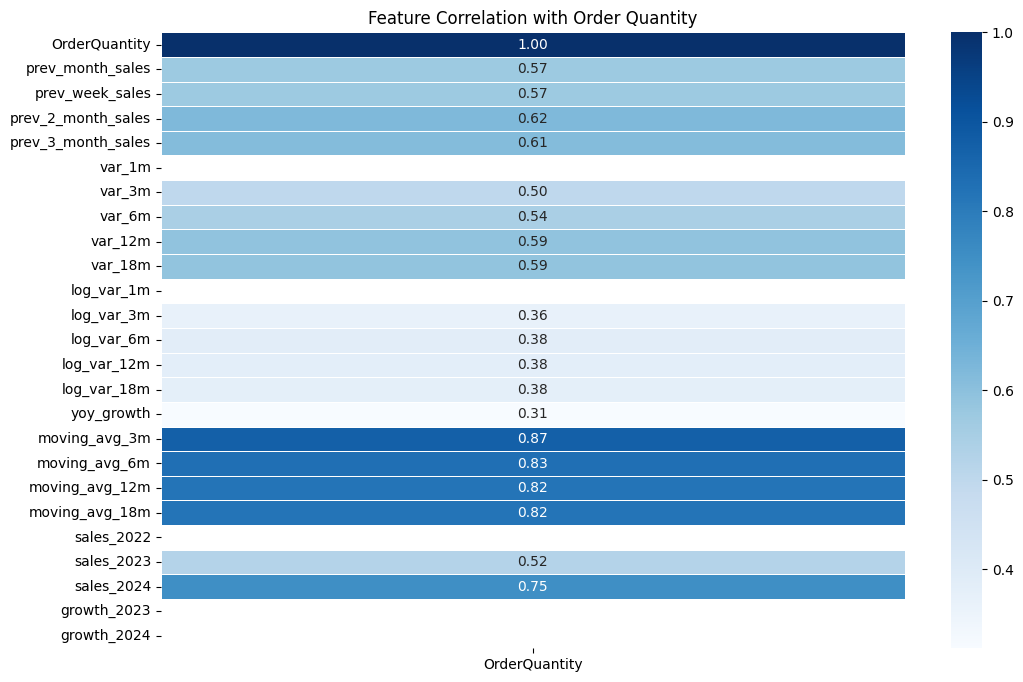

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical features
numerical_features = [
    'OrderQuantity', 'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 
    'prev_3_month_sales', 'var_1m', 'var_3m', 'var_6m', 'var_12m', 'var_18m', 
    'log_var_1m', 'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m', 
    'yoy_growth', 'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m', 
    'sales_2022', 'sales_2023', 'sales_2024', 'growth_2023', 'growth_2024'
]

# Compute correlation matrix
corr_matrix = custom_code_df[numerical_features].corr()

# Create heatmap
plt.figure(figsize=(12, 8))  # Adjust size for better readability
sns.heatmap(corr_matrix[['OrderQuantity']], cmap='Blues', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation with Order Quantity")
plt.show()

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

df = custom_code_df.copy()

features = ['ProductNumber', 'order_month', 
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024'
            ]
target = 'OrderQuantity'

X = df[features]
y = df[target]

# one-hot encoding for categorical features
categorical_features = ['ProductNumber']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# preprocessor (keeps numerical features as is)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_features)  # one-hot encode categorical features
    ], remainder='passthrough'
)

# transform the features
X_transformed = preprocessor.fit_transform(X)

df.head()

,ProductNumber,order_year,order_month,order_week,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,prev_2_month_sales,prev_3_month_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,ALB-005-0022Y,2024,9,39,191.0,160000,110031.53337,110031.53337,116746.033342,121992.77576,...,160000.000000,160000.000000,160000.000000,160000.000000,0,0,160000,NaN,inf,8000
1,ALB-005-0022Z,2024,7,30,191.0,96000,110031.53337,110031.53337,116746.033342,121992.77576,...,96000.000000,96000.000000,96000.000000,96000.000000,0,0,96000,NaN,inf,0
2,ALB-005-0023Y,2024,11,45,191.0,72000,88000.00000,88000.00000,12000.000000,121992.77576,...,57333.333333,57333.333333,57333.333333,57333.333333,0,0,72000,NaN,inf,8000
3,ALB-005-0023Y,2024,12,1,191.0,12000,110031.53337,110031.53337,116746.033342,121992.77576,...,12000.000000,12000.000000,12000.000000,12000.000000,0,0,12000,NaN,inf,8000
4,ALB-005-0023Y,2024,12,49,191.0,88000,12000.00000,12000.00000,116746.033342,121992.77576,...,50000.000000,50000.000000,50000.000000,50000.000000,0,0,88000,NaN,inf,8000


In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [9]:
customer_total = df.copy()

# define features and target
features = ['ProductNumber', 'order_month', 
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024'
           ]
target = 'OrderQuantity'

# filter the top products
total_X = customer_total[features]  # Features from top products
total_y = customer_total[target]    # Target variable

# define categorical and numeric features
categorical_features = ['ProductNumber']
numeric_features = list(set(features) - set(categorical_features))  # All other features are numeric

# Define transformations
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

# ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_features),   # One-hot encode categorical features
        ('num', scaler, numeric_features)        # Standardize numeric features
    ]
)

# Train-test split
total_X_train, total_X_val, total_y_train, total_y_val = train_test_split(total_X, total_y, test_size=0.2, random_state=42)

# Transform the features
total_X_train_transformed = preprocessor.fit_transform(total_X_train)
total_X_val_transformed = preprocessor.transform(total_X_val)

# Output the shape
print(f"Train Shape: {total_X_train_transformed.shape}, Validation Shape: {total_X_val_transformed.shape}")
print("Feature processing for top products completed successfully!")

customer_total.head()


Train Shape: (2339, 425), Validation Shape: (585, 425)
Feature processing for top products completed successfully!


,ProductNumber,order_year,order_month,order_week,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,prev_2_month_sales,prev_3_month_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,ALB-005-0022Y,2024,9,39,191.0,160000,110031.53337,110031.53337,116746.033342,121992.77576,...,160000.000000,160000.000000,160000.000000,160000.000000,0,0,160000,NaN,inf,8000
1,ALB-005-0022Z,2024,7,30,191.0,96000,110031.53337,110031.53337,116746.033342,121992.77576,...,96000.000000,96000.000000,96000.000000,96000.000000,0,0,96000,NaN,inf,0
2,ALB-005-0023Y,2024,11,45,191.0,72000,88000.00000,88000.00000,12000.000000,121992.77576,...,57333.333333,57333.333333,57333.333333,57333.333333,0,0,72000,NaN,inf,8000
3,ALB-005-0023Y,2024,12,1,191.0,12000,110031.53337,110031.53337,116746.033342,121992.77576,...,12000.000000,12000.000000,12000.000000,12000.000000,0,0,12000,NaN,inf,8000
4,ALB-005-0023Y,2024,12,49,191.0,88000,12000.00000,12000.00000,116746.033342,121992.77576,...,50000.000000,50000.000000,50000.000000,50000.000000,0,0,88000,NaN,inf,8000


In [10]:
# the top 10 (or change) products by total actual order quantity
top_products = df.groupby('ProductNumber')['OrderQuantity'].sum().nlargest(1)

# extract top product code rows from the original df
top_prods_df = df[df['ProductNumber'].isin(top_products.index)]

# Extract top product numbers
top_product_numbers = top_products.index.tolist()  # List of top product numbers

top_prods_df.head()

unique_order_years = custom_code_df['order_year'].unique()
print(unique_order_years)

[2024 2025 2023]


In [11]:
# define features and target
features = ['ProductNumber', 'order_month', 
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024'
           ]
target = 'OrderQuantity'

# filter the top products
tp_X = top_prods_df[features]  # Features from top products
tp_y = top_prods_df[target]    # Target variable

# define categorical and numeric features
categorical_features = ['ProductNumber']
numeric_features = list(set(features) - set(categorical_features))  # All other features are numeric

# Define transformations
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

# ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_features),   # One-hot encode categorical features
        ('num', scaler, numeric_features)        # Standardize numeric features
    ]
)

# Train-test split
tp_X_train, tp_X_val, tp_y_train, tp_y_val = train_test_split(tp_X, tp_y, test_size=0.2, random_state=42)

# Transform the features
tp_X_train_transformed = preprocessor.fit_transform(tp_X_train)
tp_X_val_transformed = preprocessor.transform(tp_X_val)

# Output the shape
print(f"Train Shape: {tp_X_train_transformed.shape}, Validation Shape: {tp_X_val_transformed.shape}")
print("Feature processing for top products completed successfully!")


Train Shape: (24, 21), Validation Shape: (6, 21)
Feature processing for top products completed successfully!


In [12]:
from sklearn.ensemble import RandomForestRegressor
import sys
sys.path.append('../src')
from model_utils import find_best_hyperparameters, param_grids, evaluate_model

In [13]:
# train the model with scaled features (Random Forest Regressor)
rf = RandomForestRegressor()
rf_params = find_best_hyperparameters(rf, param_grids(rf.__class__.__name__), X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, 

In [14]:
rf = RandomForestRegressor(**rf_params)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_val_scaled)

In [15]:
print('---------------------- TRAINING PERFORMANCE ----------------------')
evaluate_model(rf, X_train_scaled, y_train)
print('--------------------------------------------')

print('---------------------- TEST PERFORMANCE ----------------------')
evaluate_model(rf, X_val_scaled, y_val)
print('--------------------------------------------')

---------------------- TRAINING PERFORMANCE ----------------------
Evaluating model...
Model: RandomForestRegressor
Mean Absolute Error (MAE): 13425.2470
Mean Squared Error (MSE): 4120794822.7493
Root Mean Squared Error (RMSE): 64193.4173
R-squared (R²): 0.9488
--------------------------------------------
---------------------- TEST PERFORMANCE ----------------------
Evaluating model...
Model: RandomForestRegressor
Mean Absolute Error (MAE): 21497.8673
Mean Squared Error (MSE): 6628076543.7655
Root Mean Squared Error (RMSE): 81412.9998
R-squared (R²): 0.8382
--------------------------------------------


In [16]:
# train the model with scaled features (Random Forest Regressor) - TOTAL CUSTOM PRODUCTS IMPLEMENTATION
total_rf = RandomForestRegressor()
total_rf_params = find_best_hyperparameters(total_rf, param_grids(total_rf.__class__.__name__), total_X_train_transformed, total_y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, 

In [17]:
total_rf = RandomForestRegressor(**total_rf_params)
total_rf.fit(total_X_train_transformed, total_y_train)
total_y_pred_rf = total_rf.predict(total_X_val_transformed)

In [18]:
print('---------------------- TRAINING PERFORMANCE ----------------------')
evaluate_model(total_rf, total_X_train_transformed, total_y_train)
print('--------------------------------------------')

print('---------------------- TEST PERFORMANCE ----------------------')
evaluate_model(total_rf, total_X_val_transformed, total_y_val)
print('--------------------------------------------')

---------------------- TRAINING PERFORMANCE ----------------------
Evaluating model...
Model: RandomForestRegressor
Mean Absolute Error (MAE): 13167.0859
Mean Squared Error (MSE): 3552920316.8209
Root Mean Squared Error (RMSE): 59606.3782
R-squared (R²): 0.9558
--------------------------------------------
---------------------- TEST PERFORMANCE ----------------------
Evaluating model...
Model: RandomForestRegressor
Mean Absolute Error (MAE): 21228.5333
Mean Squared Error (MSE): 6384593815.5897
Root Mean Squared Error (RMSE): 79903.6533
R-squared (R²): 0.8441
--------------------------------------------


In [19]:
# train the model with scaled features (Random Forest Regressor) - TOP PRODUCTS IMPLEMENTATION
tp_rf = RandomForestRegressor()
tp_rf_params = find_best_hyperparameters(tp_rf, param_grids(tp_rf.__class__.__name__), tp_X_train_transformed, tp_y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, 

In [20]:
tp_rf = RandomForestRegressor(**tp_rf_params)
tp_rf.fit(tp_X_train_transformed, tp_y_train)
tp_y_pred_rf = tp_rf.predict(tp_X_val_transformed)

In [21]:
print('---------------------- TRAINING PERFORMANCE ----------------------')
evaluate_model(tp_rf, tp_X_train_transformed, tp_y_train)
print('--------------------------------------------')

print('---------------------- TEST PERFORMANCE ----------------------')
evaluate_model(tp_rf, tp_X_val_transformed, tp_y_val)
print('--------------------------------------------')

---------------------- TRAINING PERFORMANCE ----------------------
Evaluating model...
Model: RandomForestRegressor
Mean Absolute Error (MAE): 533329.1667
Mean Squared Error (MSE): 504415907916.6667
Root Mean Squared Error (RMSE): 710222.4355
R-squared (R²): 0.2734
--------------------------------------------
---------------------- TEST PERFORMANCE ----------------------
Evaluating model...
Model: RandomForestRegressor
Mean Absolute Error (MAE): 894666.6667
Mean Squared Error (MSE): 1102279776666.6667
Root Mean Squared Error (RMSE): 1049895.1265
R-squared (R²): -0.3518
--------------------------------------------


[146351.85714285716, 50497.55555555556, 43351.66666666666, 81725.04761904762, 615229.0476190475, 50000.0, 20020.0, 759855.9523809524, 257033.3333333334, 44953.5, 21286.679653679654, 19179.86666666667, 98786.66666666666, 99798.66666666669, 189182.85714285716, 10009.841269841269, 63820.0, 402260.6060606061, 30000.0, 30000.0, 200020.0, 66593.09523809524, 308342.61904761905, 25525.666666666664, 10477.10158730159, 89819.76190476191, 30000.0, 25268.666666666664, 32053.131746031744, 191753.6038961039, 24513.0, 11304.761904761905, 9735.771428571428, 81091.90476190476, 128623.27777777778, 50000.0, 50000.0, 65480.7619047619, 1935635.8946608945, 154504.60317460317, 138856.07142857145, 35672.666666666664, 80000.0, 367835.43650793657, 330795.8809523809, 98499.64285714286, 20553.809523809523, 128121.68253968257, 461936.6666666666, 70547.63333333335, 240590.09523809524, 12246.228571428574, 74600.0, 259934.88095238095, 249773.69047619047, 475824.80158730166, 261197.04761904766, 819199.3001443, 18943.1

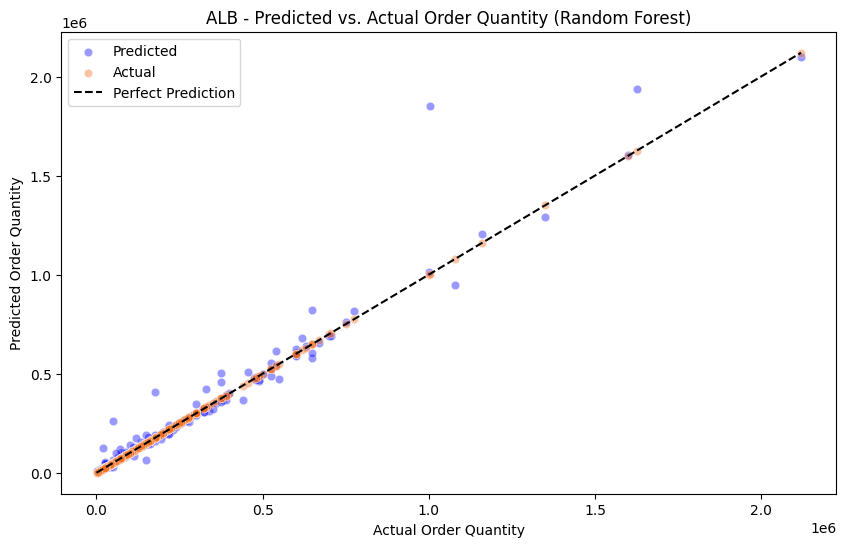

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

print(y_pred_rf.tolist())

plt.figure(figsize=(10, 6))

# scatter plot, actual vs predicted values
sns.scatterplot(x=y_val, y=y_pred_rf, alpha=0.4, color='blue', label='Predicted')  # Predicted values in blue

# actual values in red
sns.scatterplot(x=y_val, y=y_val, alpha=0.4, color='#f26d1d', label='Actual')

# reference line for perfect prediction
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='black', label="Perfect Prediction")

plt.xlabel("Actual Order Quantity")
plt.ylabel("Predicted Order Quantity")
plt.title(f"{custom_ref} - Predicted vs. Actual Order Quantity (Random Forest)")
plt.legend()

plt.show()

/var/folders/31/9bd8ksys1rzbjk8qs9scl95h0000gn/T/ipykernel_63452/1606837329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_prods_df['OrderDate'] = pd.to_datetime(top_prods_df[['order_year', 'order_month']].astype(str).agg('-'.join, axis=1))


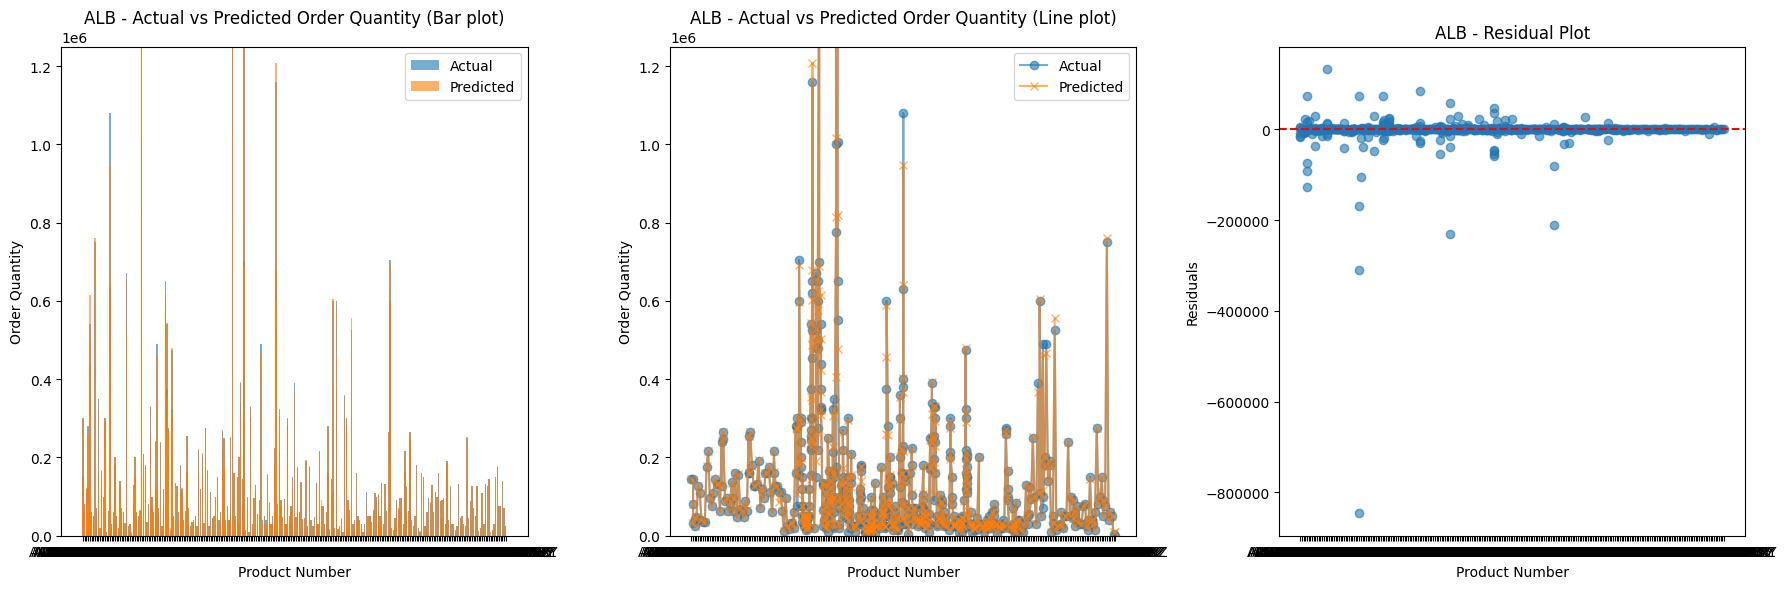

In [23]:
# Convert order year and month to datetime format
top_prods_df['OrderDate'] = pd.to_datetime(top_prods_df[['order_year', 'order_month']].astype(str).agg('-'.join, axis=1))

# Sort by OrderDate to maintain time order
top_prods_df = top_prods_df.sort_values(by='OrderDate')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Bar plot, actual and predicted values over time
axes[0].bar(df.loc[y_val.index, 'ProductNumber'], y_val, label='Actual', alpha=0.6)
axes[0].bar(df.loc[y_val.index, 'ProductNumber'], y_pred_rf, label='Predicted', alpha=0.6)
axes[0].set_xlabel('Product Number')
axes[0].set_ylabel('Order Quantity')
axes[0].set_title(f'{custom_ref} - Actual vs Predicted Order Quantity (Bar plot)')
axes[0].set_ylim(0, 1250000)
axes[0].legend()

# Line plot, actual and predicted values
sorted_indices = df.loc[y_val.index, 'ProductNumber'].argsort()
sorted_products = df.loc[y_val.index, 'ProductNumber'].iloc[sorted_indices]
sorted_actual = y_val.iloc[sorted_indices]
sorted_predicted = y_pred_rf[sorted_indices]

axes[1].plot(sorted_products, sorted_actual, label='Actual', alpha=0.6, marker='o')
axes[1].plot(sorted_products, sorted_predicted, label='Predicted', alpha=0.6, marker='x')
axes[1].set_xlabel('Product Number')
axes[1].set_ylabel('Order Quantity')
axes[1].set_title(f'{custom_ref} - Actual vs Predicted Order Quantity (Line plot)')
axes[1].set_ylim(0, 1250000)
axes[1].legend()

# Residual plot
residuals = y_val - y_pred_rf
axes[2].scatter(df.loc[y_val.index, 'ProductNumber'], residuals, alpha=0.6)
axes[2].axhline(y=0, color='r', linestyle='--')
axes[2].set_xlabel('Product Number')
axes[2].set_ylabel('Residuals')
axes[2].set_title(f'{custom_ref} - Residual Plot')

plt.tight_layout()
plt.show()


In [24]:
# Convert order year and month to datetime format
customer_total['OrderDate'] = pd.to_datetime(customer_total[['order_year', 'order_month']].astype(str).agg('-'.join, axis=1))

# Sort by OrderDate to maintain time order
customer_total = customer_total.sort_values(by='OrderDate')

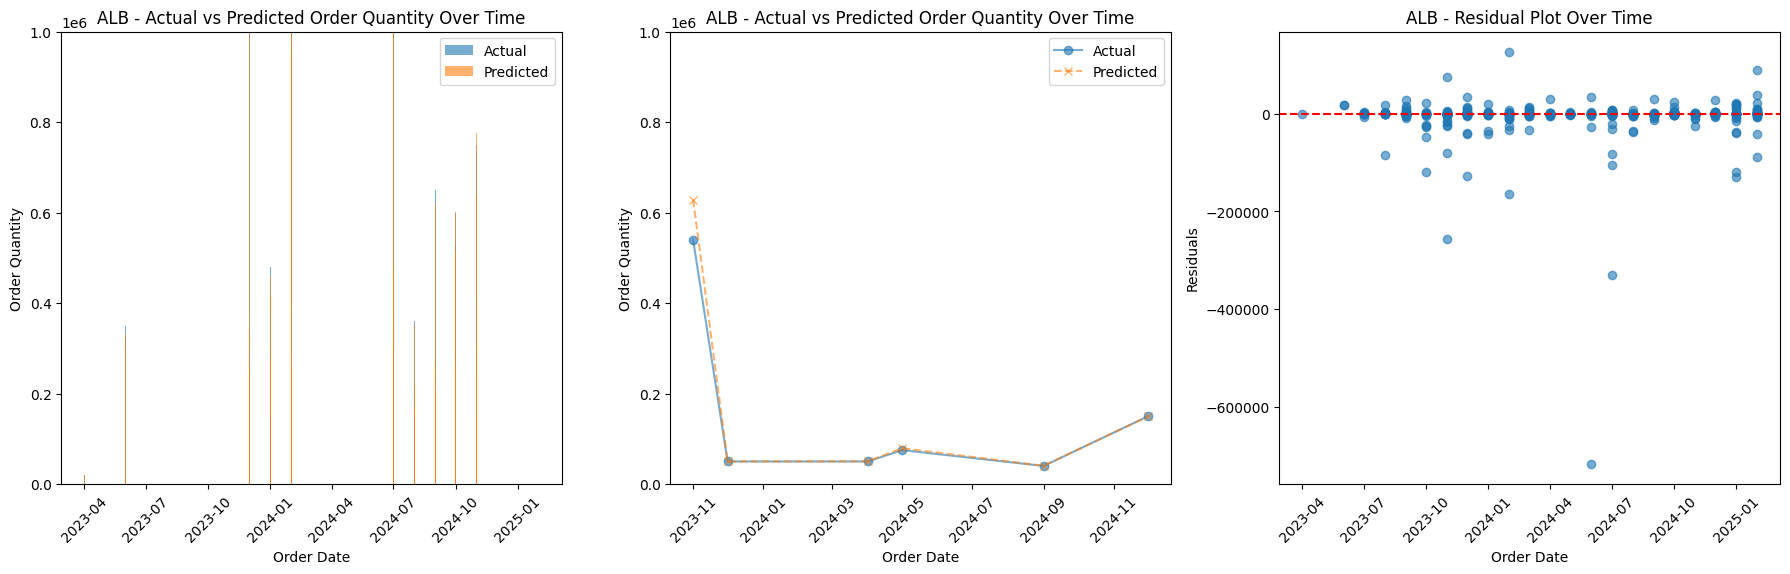

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Bar plot, actual and predicted values over time
axes[0].bar(customer_total.loc[total_y_val.index, 'OrderDate'], total_y_val, label='Actual', alpha=0.6)
axes[0].bar(customer_total.loc[total_y_val.index, 'OrderDate'], total_y_pred_rf, label='Predicted', alpha=0.6)
axes[0].set_xlabel('Order Date')
axes[0].set_ylabel('Order Quantity')
axes[0].set_title(f'{custom_ref} - Actual vs Predicted Order Quantity Over Time')
axes[0].set_ylim(0, 1000000)
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Line plot, actual and predicted values over time
sorted_indices = customer_total.loc[tp_y_val.index, 'OrderDate'].argsort()
sorted_dates = top_prods_df.loc[tp_y_val.index, 'OrderDate'].iloc[sorted_indices]
sorted_actual = total_y_val.iloc[sorted_indices]
sorted_predicted = total_y_pred_rf[sorted_indices]

axes[1].plot(sorted_dates, sorted_actual, label='Actual', alpha=0.6, marker='o', linestyle='-')
axes[1].plot(sorted_dates, sorted_predicted, label='Predicted', alpha=0.6, marker='x', linestyle='--')
axes[1].set_xlabel('Order Date')
axes[1].set_ylabel('Order Quantity')
axes[1].set_title(f'{custom_ref} - Actual vs Predicted Order Quantity Over Time')
axes[1].set_ylim(0, 1000000)
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

# Residual plot over time
residuals = total_y_val - total_y_pred_rf
axes[2].scatter(customer_total.loc[total_y_val.index, 'OrderDate'], residuals, alpha=0.6)
axes[2].axhline(y=0, color='r', linestyle='--')
axes[2].set_xlabel('Order Date')
axes[2].set_ylabel('Residuals')
axes[2].set_title(f'{custom_ref} - Residual Plot Over Time')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [26]:
# # Group data by OrderDate and sum the relevant numerical columns
# customer_total = top_prods_df.groupby('OrderDate').sum(numeric_only=True).reset_index()

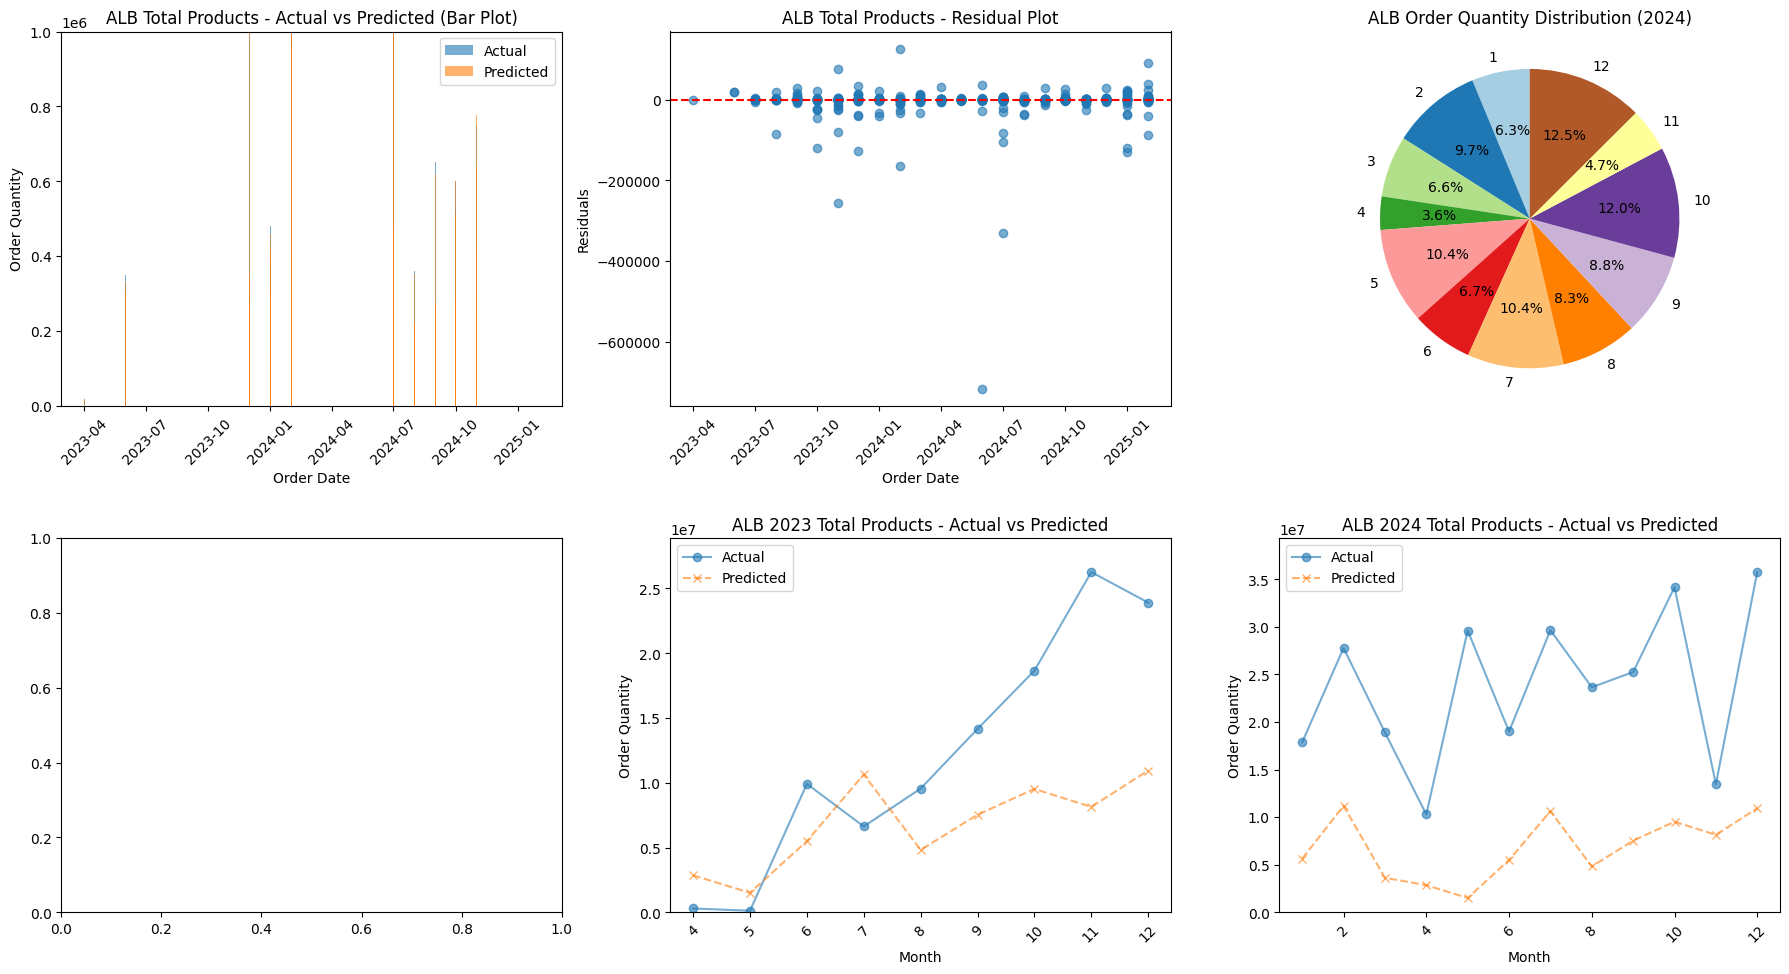

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust layout for better spacing

# Bar plot: Actual vs. Predicted Order Quantity
axes[0, 0].bar(customer_total.loc[total_y_val.index, 'OrderDate'], total_y_val, label='Actual', alpha=0.6)
axes[0, 0].bar(customer_total.loc[total_y_val.index, 'OrderDate'], total_y_pred_rf, label='Predicted', alpha=0.6)
axes[0, 0].set_xlabel('Order Date')
axes[0, 0].set_ylabel('Order Quantity')
axes[0, 0].set_title(f'{custom_ref} Total Products - Actual vs Predicted (Bar Plot)')
axes[0, 0].set_ylim(0, 1_000_000)
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# Residual Plot
residuals = total_y_val - total_y_pred_rf
axes[0, 1].scatter(customer_total.loc[total_y_val.index, 'OrderDate'], residuals, alpha=0.6)
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Order Date')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title(f'{custom_ref} Total Products - Residual Plot')
axes[0, 1].tick_params(axis='x', rotation=45)

# Pie Chart: Order Quantity per Month (2024)
order_2024 = customer_total[customer_total['order_year'] == 2024].groupby('order_month')['OrderQuantity'].sum()
axes[0, 2].pie(order_2024, labels=order_2024.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[0, 2].set_title(f'{custom_ref} Order Quantity Distribution (2024)')

# Line Plots: Yearly Trends
for i, year in enumerate([2022, 2023, 2024]):  
    yearly_df = customer_total[customer_total['order_year'] == year]

    if yearly_df.empty:
        continue  # skip if no data for that year

    # Aggregate OrderQuantity per month
    monthly_actual = yearly_df.groupby('order_month')['OrderQuantity'].sum()

    # Convert total_y_pred_rf to Pandas Series with index from customer_total
    pred_series = pd.Series(total_y_pred_rf, index=total_y_val.index)

    # Group predictions by month
    monthly_predicted = pred_series.groupby(customer_total.loc[total_y_val.index, 'order_month']).sum()

    # Sort for proper plotting
    monthly_actual = monthly_actual.sort_index()
    monthly_predicted = monthly_predicted.reindex(monthly_actual.index)  # Ensure same months

    # Plot actual and predicted values for the year
    axes[1, i].plot(monthly_actual.index, monthly_actual, label='Actual', alpha=0.6, marker='o', linestyle='-')
    axes[1, i].plot(monthly_predicted.index, monthly_predicted, label='Predicted', alpha=0.6, marker='x', linestyle='--')

    axes[1, i].set_xlabel('Month')
    axes[1, i].set_ylabel('Order Quantity')
    axes[1, i].set_title(f'{custom_ref} {year} Total Products - Actual vs Predicted')
    axes[1, i].set_ylim(0, max(monthly_actual.max(), monthly_predicted.max()) * 1.1)  # Scale Y axis
    axes[1, i].legend()
    axes[1, i].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing between subplots
plt.tight_layout()
plt.show()


In [28]:
has_orders_2022 = not customer_total[customer_total['order_year'] == 2022].empty
print(f"Orders in 2022 exist: {has_orders_2022}")


Orders in 2022 exist: False


In [29]:
customer_total.head(10)

,ProductNumber,order_year,order_month,order_week,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,prev_2_month_sales,prev_3_month_sales,...,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv,OrderDate
624,ALB-026-0017Z,2023,4,17,191.0,90000,90000.00000,90000.00000,116746.033342,121992.77576,...,90000.000000,90000.000000,90000.000000,0,90000,0,inf,-100.0,20000,2023-04-01
431,ALB-026-0007Z,2023,4,15,191.0,75000,110031.53337,110031.53337,116746.033342,121992.77576,...,75000.000000,75000.000000,75000.000000,0,75000,0,inf,-100.0,0,2023-04-01
680,ALB-026-0019Z,2023,4,17,191.0,30000,30000.00000,30000.00000,116746.033342,121992.77576,...,30000.000000,30000.000000,30000.000000,0,30000,0,inf,-100.0,10000,2023-04-01
325,ALB-026-0001Z,2023,4,14,191.0,60000,60000.00000,60000.00000,40000.000000,60000.00000,...,50000.000000,53333.333333,52857.142857,0,60000,0,inf,-100.0,15000,2023-04-01
591,ALB-026-0016Z,2023,4,16,191.0,19000,110031.53337,110031.53337,116746.033342,121992.77576,...,19000.000000,19000.000000,19000.000000,0,19000,0,inf,-100.0,0,2023-04-01
565,ALB-026-0015Z,2023,4,16,191.0,19000,110031.53337,110031.53337,116746.033342,121992.77576,...,19000.000000,19000.000000,19000.000000,0,19000,0,inf,-100.0,0,2023-04-01
681,ALB-026-0019Z,2023,5,18,191.0,30000,110031.53337,110031.53337,116746.033342,121992.77576,...,30000.000000,30000.000000,30000.000000,0,30000,0,inf,-100.0,10000,2023-05-01
625,ALB-026-0017Z,2023,5,18,191.0,90000,110031.53337,110031.53337,116746.033342,121992.77576,...,90000.000000,90000.000000,90000.000000,0,90000,0,inf,-100.0,20000,2023-05-01
698,ALB-026-0021Z,2023,6,25,191.0,150000,20000.00000,20000.00000,40000.000000,40000.00000,...,50833.333333,54583.333333,56666.666667,0,150000,0,inf,-100.0,15000,2023-06-01
722,ALB-026-0022Z,2023,6,25,191.0,150000,45000.00000,45000.00000,60000.000000,60000.00000,...,65000.000000,63750.000000,65833.333333,0,150000,0,inf,-100.0,0,2023-06-01


In [30]:
# from powerbiclient import QuickVisualize, get_dataset_config, Report
# from powerbiclient.authentication import InteractiveLoginAuthentication, DeviceCodeLoginAuthentication
# import pandas as pd

# prod_sales = pd.read_csv(
#     '/Users/mwilko777/Desktop/Project/Software Artifact/datasets/stock_forecasting/final/product_sales.csv')

# # use DeviceCodeLoginAuthentication if want to sign in each time, else InteractiveLoginAuthentication
# auth = InteractiveLoginAuthentication()
# print("Authentication successful.")


# def visual():
#     dataset_config = get_dataset_config(prod_sales)
#     return QuickVisualize(dataset_config, auth)

# visual()